In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import csv
import scipy.stats as st

In [2]:
# Study data files
physical_activity_path = "../../data/Physical_activity.csv"
suicide_path = "../../data/Suicide.csv"

In [3]:
# Read the data and store into Pandas DataFrame
physical_activity = pd.read_csv(physical_activity_path)

# Display the data table for preview
physical_activity.head()

,Year,LocationAbbr,Location,Question,Data_Value,Low_Confidence,High_Confidence,Sample_Size,Age(years),Gender,Race/Ethnicity
0,2020,US,National,Percent of adults who engage in no leisure-tim...,30.6,29.4,31.8,31255.0,NaN,NaN,Hispanic
1,2015,US,National,Percent of adults who achieve at least 300 min...,26.6,25.6,27.6,30904.0,NaN,NaN,NaN
2,2015,GU,Guam,Percent of adults who achieve at least 150 min...,27.4,18.6,38.5,125.0,NaN,NaN,Hispanic
3,2015,PR,Puerto Rico,Percent of adults who engage in no leisure-tim...,38.1,32.6,43.8,421.0,NaN,NaN,NaN
4,2015,GU,Guam,Percent of adults who engage in no leisure-tim...,30.5,25.8,35.6,559.0,NaN,NaN,NaN


In [4]:
# Read the data
suicide = pd.read_csv(suicide_path)

# Display the data table for preview
suicide.head()

,YEAR,STATE,RATE,DEATHS
0,2020,AL,16.0,793
1,2020,AK,27.5,204
2,2020,AZ,17.6,1363
3,2020,AR,19.0,583
4,2020,CA,10.0,4144


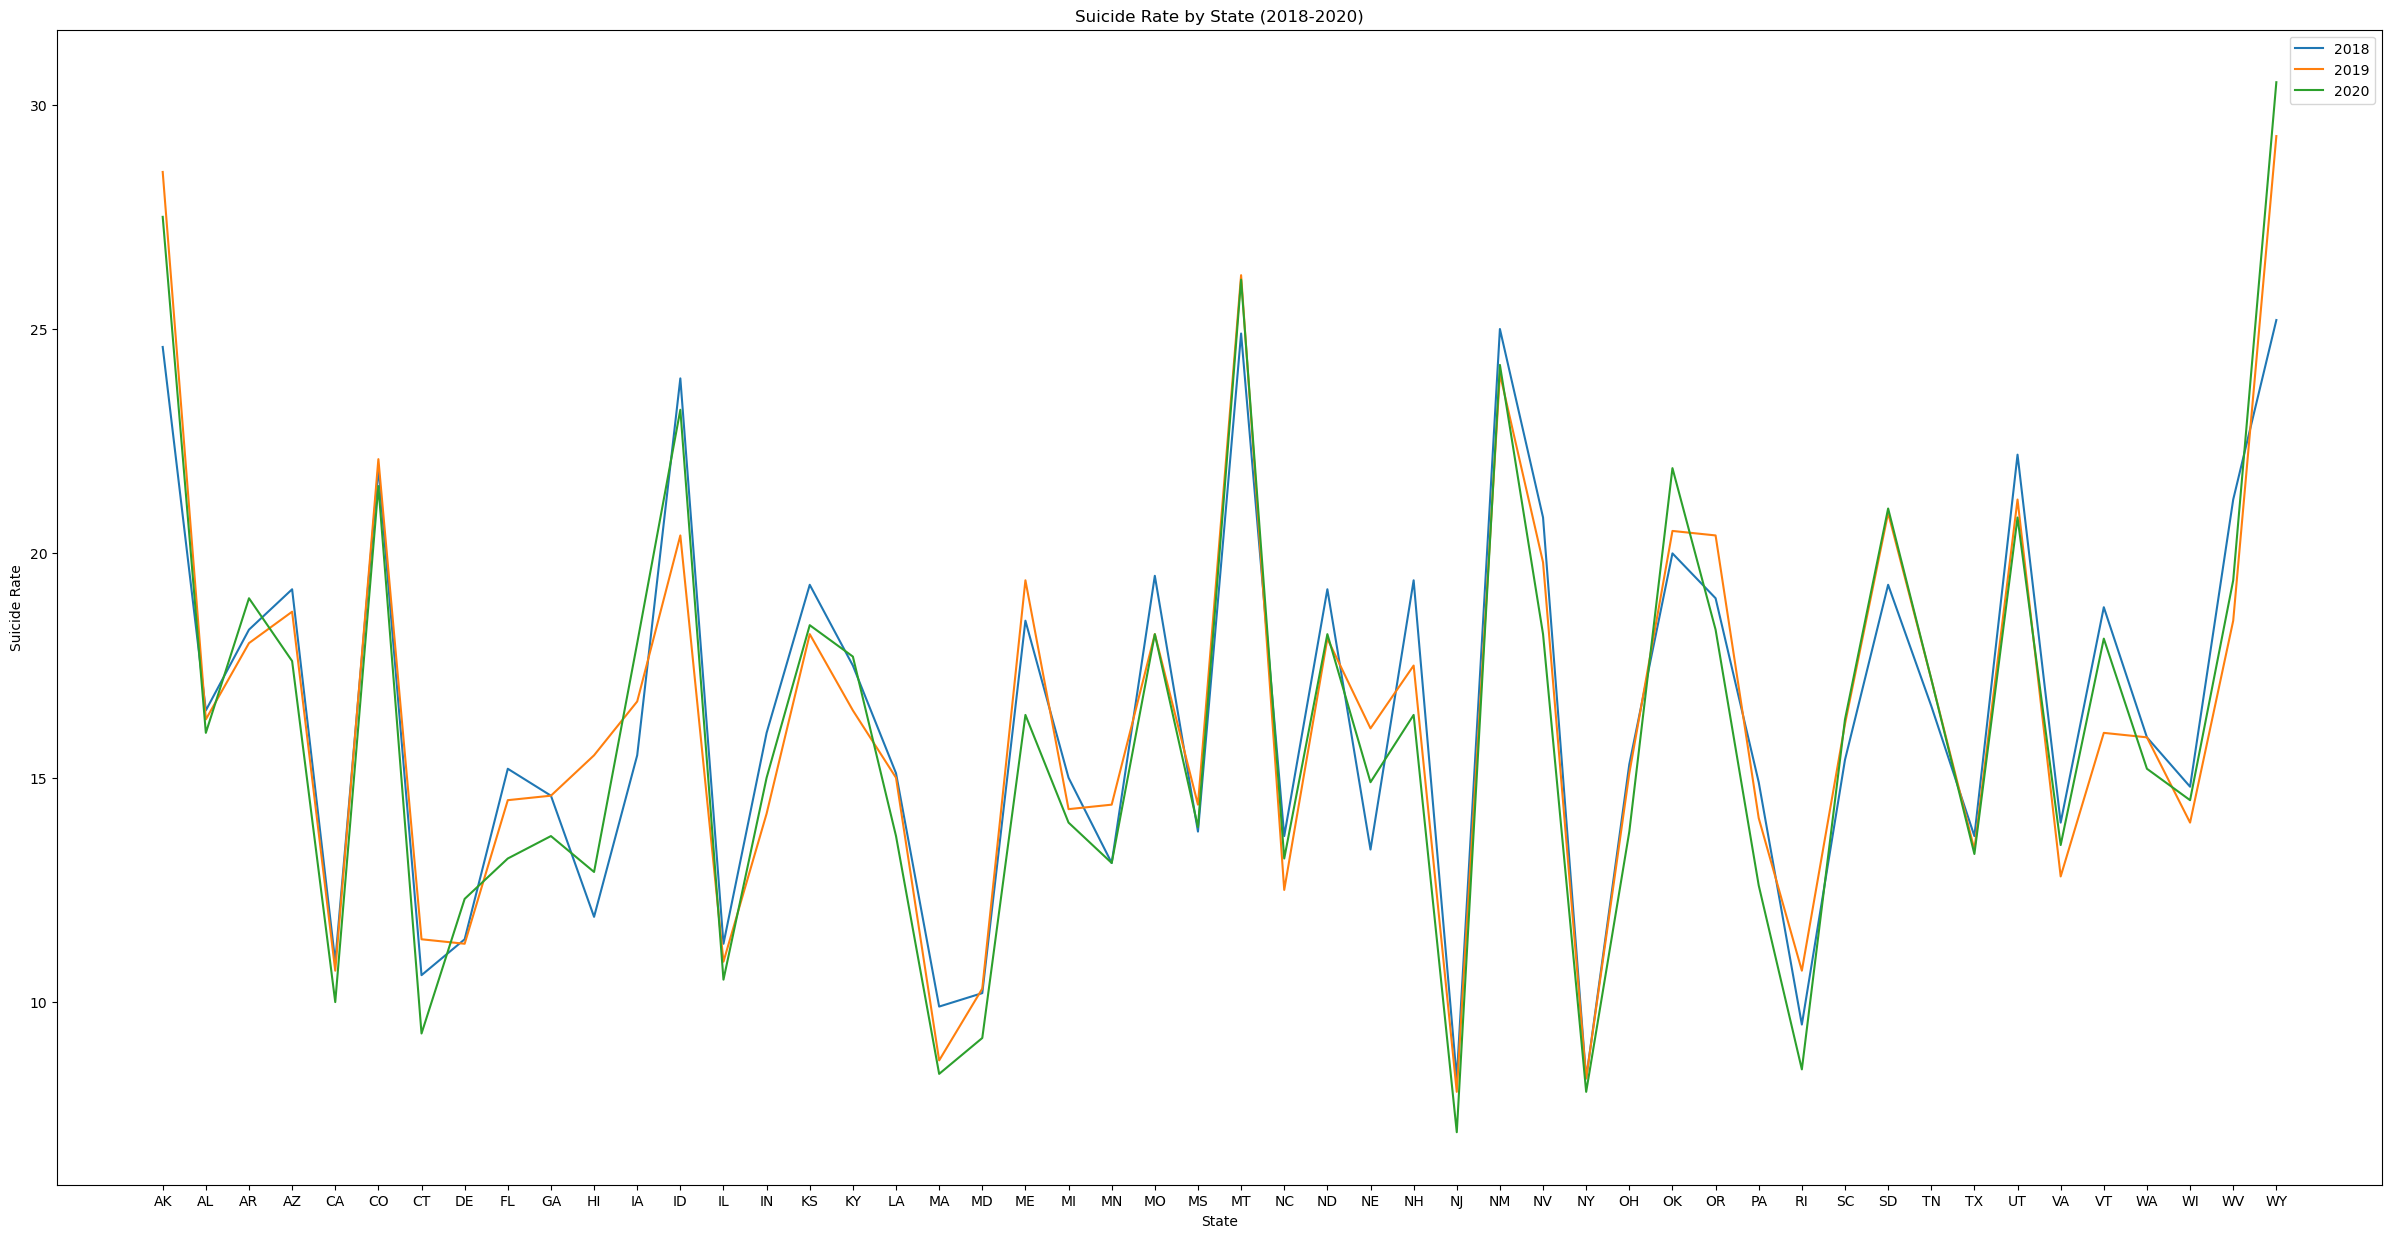

In [5]:
# Filter the data for years 2019, 2020, and 2021
years = [2018, 2019, 2020]
suicide_years = suicide[suicide['YEAR'].isin(years)]

# Group the data by year and state, and calculate the mean rate
grouped = suicide_years.groupby(['YEAR', 'STATE']).mean().reset_index()

# Create a line graph with three lines for each year
plt.figure(figsize=(30,15))

for year in years:
    data = grouped[grouped['YEAR'] == year]
    plt.plot(data['STATE'], data['RATE'], label=str(year))

plt.xlabel('State')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rate by State (2018-2020)')
plt.legend()
plt.savefig("../../images/Suicide 2018-2020.png")
plt.show()

In [6]:
# Filter the DataFrame down only to those columns to chart
suicide_clean = suicide.loc[suicide['YEAR']==2020]
suicide_clean = suicide_clean[["STATE","RATE"]]

suicide_clean.head()


,STATE,RATE
0,AL,16.0
1,AK,27.5
2,AZ,17.6
3,AR,19.0
4,CA,10.0


In [7]:
# Set the index to be "State" so they will be used as labels
suicide_clean_df = suicide_clean.set_index("STATE")

suicide_clean_df.head()

,RATE
STATE,
AL,16.0
AK,27.5
AZ,17.6
AR,19.0
CA,10.0


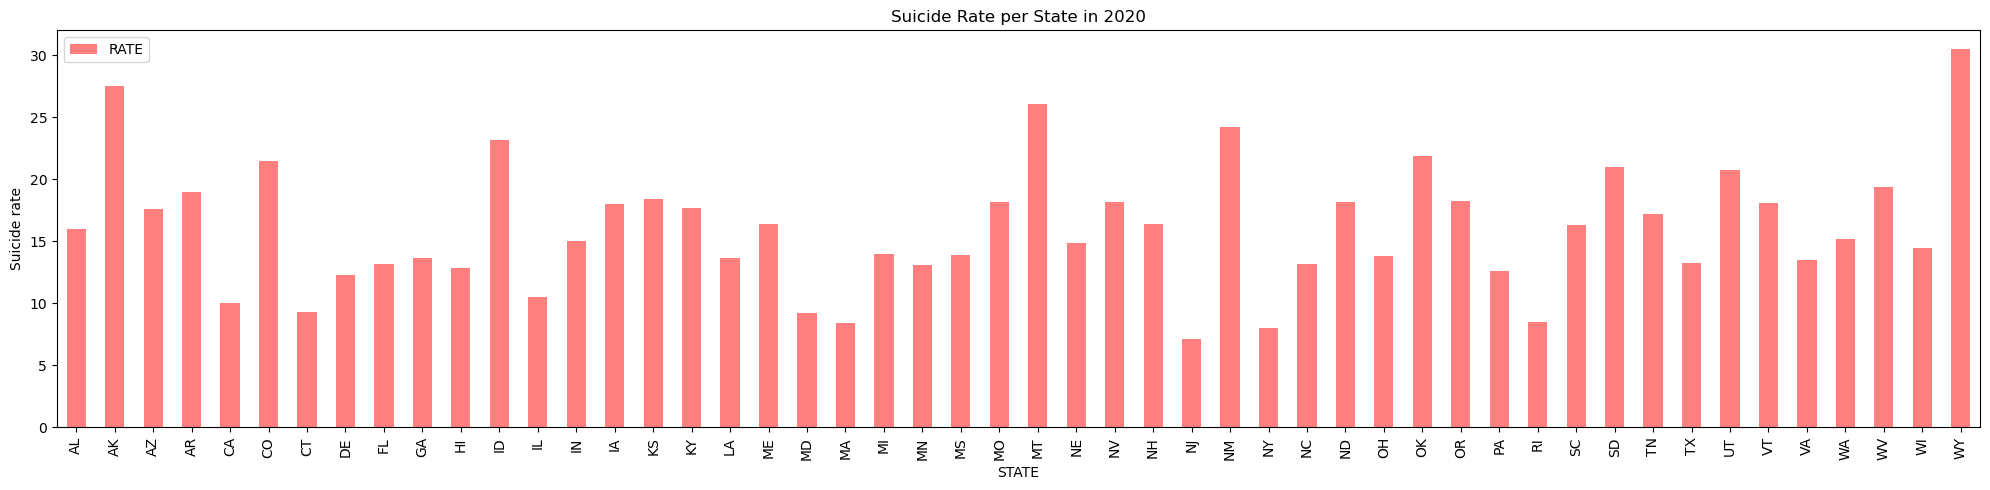

In [8]:
# Use DataFrame.plot() in order to create a bar chart of the data
suicide_clean_df.plot(kind="bar", figsize=(20,5), color="r", alpha=0.5)

# Set a title for the chart
plt.title("Suicide Rate per State in 2020")
plt.ylabel("Suicide rate")
plt.tight_layout()
plt.savefig("../../images/Suicide2020.png")
plt.show()


In [9]:
# Rename the columns
physical_activity = physical_activity.rename(columns={'YearEnd':'Year', 'LocationAbbr':'State'})

In [10]:
suicide = suicide.rename(columns={'YEAR':'Year', 'STATE':'State', 'RATE':'Suicide Rate'})

In [11]:
# Merge two dataframes
suicide_activity_df = pd.merge(suicide, physical_activity, on=["Year","State"], how="outer")
suicide
suicide_activity_df.head()

,Year,State,Suicide Rate,DEATHS,Location,Question,Data_Value,Low_Confidence,High_Confidence,Sample_Size,Age(years),Gender,Race/Ethnicity
0,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,34.6,31.4,38.1,1346.0,NaN,NaN,Non-Hispanic Black
1,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,22.5,18.6,26.9,576.0,25 - 34,NaN,NaN
2,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,45.9,40.0,51.8,487.0,NaN,NaN,NaN
3,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,24.2,14.1,38.5,79.0,NaN,NaN,2 or more races
4,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,34.7,31.7,37.7,1528.0,NaN,NaN,NaN


# Year 2020

In [12]:
# Filter by the year of 2020
suicide_activity_2020_df = suicide_activity_df.loc[suicide_activity_df['Year'] == 2020]
suicide_activity_2020_df.head()

,Year,State,Suicide Rate,DEATHS,Location,Question,Data_Value,Low_Confidence,High_Confidence,Sample_Size,Age(years),Gender,Race/Ethnicity
0,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,34.6,31.4,38.1,1346.0,NaN,NaN,Non-Hispanic Black
1,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,22.5,18.6,26.9,576.0,25 - 34,NaN,NaN
2,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,45.9,40.0,51.8,487.0,NaN,NaN,NaN
3,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,24.2,14.1,38.5,79.0,NaN,NaN,2 or more races
4,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,34.7,31.7,37.7,1528.0,NaN,NaN,NaN


In [13]:
# Filter by the question to only consider people who do not exercise
suicide_activity_2020_no_activity_df = suicide_activity_2020_df.loc[suicide_activity_2020_df['Question'] == "Percent of adults who engage in no leisure-time physical activity"]
suicide_activity_2020_no_activity_df.head()

,Year,State,Suicide Rate,DEATHS,Location,Question,Data_Value,Low_Confidence,High_Confidence,Sample_Size,Age(years),Gender,Race/Ethnicity
0,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,34.6,31.4,38.1,1346.0,NaN,NaN,Non-Hispanic Black
1,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,22.5,18.6,26.9,576.0,25 - 34,NaN,NaN
2,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,45.9,40.0,51.8,487.0,NaN,NaN,NaN
3,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,24.2,14.1,38.5,79.0,NaN,NaN,2 or more races
4,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,34.7,31.7,37.7,1528.0,NaN,NaN,NaN


In [14]:
# Filter down to data value, sample size, gender, and state
Value_by_gender_2020 = suicide_activity_2020_no_activity_df[["Data_Value","Sample_Size","Gender","State"]]
Value_by_gender_2020.head()

,Data_Value,Sample_Size,Gender,State
0,34.6,1346.0,NaN,AL
1,22.5,576.0,NaN,AL
2,45.9,487.0,NaN,AL
3,24.2,79.0,NaN,AL
4,34.7,1528.0,NaN,AL


In [15]:
# Set index to State
Value_by_gender_2020 = Value_by_gender_2020.dropna().set_index("State")
Value_by_gender_2020

,Data_Value,Sample_Size,Gender
State,,,
AL,25.2,2171.0,Male
AL,32.1,3165.0,Female
AK,24.7,1851.0,Female
AK,18.2,1810.0,Male
AZ,20.4,4755.0,Male
...,...,...,...
PR,39.8,1978.0,Male
GU,21.6,1017.0,Male
GU,30.2,1165.0,Female


In [16]:
# Finding the total number of people who do not exercise, by state and gender
Value_by_gender_2020["no_physical_activity"] = Value_by_gender_2020["Data_Value"] * Value_by_gender_2020["Sample_Size"] / 100
Value_by_gender_2020.head()

,Data_Value,Sample_Size,Gender,no_physical_activity
State,,,,
AL,25.2,2171.0,Male,547.092
AL,32.1,3165.0,Female,1015.965
AK,24.7,1851.0,Female,457.197
AK,18.2,1810.0,Male,329.420
AZ,20.4,4755.0,Male,970.020


In [17]:
# Add up the values for female and male by state to find the total number for each state
total_people_2020 = Value_by_gender_2020.groupby("State")["Sample_Size","no_physical_activity"].sum()
total_people_2020.head()

C:\Users\MishkisPCDell\AppData\Local\Temp\ipykernel_4036\3609015436.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_people_2020 = Value_by_gender_2020.groupby("State")["Sample_Size","no_physical_activity"].sum()


,Sample_Size,no_physical_activity
State,,
AK,3661.0,786.617
AL,5336.0,1563.057
AR,5231.0,1586.524
AZ,10276.0,2311.623
CA,4797.0,1017.825


In [18]:
# Dividing by the total sample size to get the average inactivity rate for each state
avg_no_physical_activity_2020 = total_people_2020["no_physical_activity"] / total_people_2020["Sample_Size"] * 100

total_people_2020["no physical activity rate"] = avg_no_physical_activity_2020

total_people_2020.head()



,Sample_Size,no_physical_activity,no physical activity rate
State,,,
AK,3661.0,786.617,21.486397
AL,5336.0,1563.057,29.292672
AR,5231.0,1586.524,30.329268
AZ,10276.0,2311.623,22.495358
CA,4797.0,1017.825,21.217949


In [19]:
# Filter by year 2020 and merging
suicide_2020 = suicide.loc[suicide['Year'] == 2020]
suicide_2020
merged_suicide_activity_2020_df = pd.merge(suicide_2020, total_people_2020, on=["State"], how="outer")
#merged_suicide_activity_2020_df["Year"] =merged_suicide_activity_2020_df["Year"].map("{:,}".format)

merged_suicide_activity_2020_df


,Year,State,Suicide Rate,DEATHS,Sample_Size,no_physical_activity,no physical activity rate
0,2020.0,AL,16.0,793,5336.0,1563.057,29.292672
1,2020.0,AK,27.5,204,3661.0,786.617,21.486397
2,2020.0,AZ,17.6,1363,10276.0,2311.623,22.495358
3,2020.0,AR,19.0,583,5231.0,1586.524,30.329268
4,2020.0,CA,10.0,4144,4797.0,1017.825,21.217949
5,2020.0,CO,21.5,1302,10173.0,1696.255,16.674088
6,2020.0,CT,9.3,364,8965.0,1852.968,20.668912
7,2020.0,DE,12.3,124,4021.0,997.621,24.810271
8,2020.0,FL,13.2,3135,11781.0,3179.799,26.990909
9,2020.0,GA,13.7,1491,9068.0,2276.535,25.105150


In [20]:
# Drop the not available values
merged_suicide_activity_2020_df = merged_suicide_activity_2020_df.dropna()
merged_suicide_activity_2020_df

,Year,State,Suicide Rate,DEATHS,Sample_Size,no_physical_activity,no physical activity rate
0,2020.0,AL,16.0,793,5336.0,1563.057,29.292672
1,2020.0,AK,27.5,204,3661.0,786.617,21.486397
2,2020.0,AZ,17.6,1363,10276.0,2311.623,22.495358
3,2020.0,AR,19.0,583,5231.0,1586.524,30.329268
4,2020.0,CA,10.0,4144,4797.0,1017.825,21.217949
5,2020.0,CO,21.5,1302,10173.0,1696.255,16.674088
6,2020.0,CT,9.3,364,8965.0,1852.968,20.668912
7,2020.0,DE,12.3,124,4021.0,997.621,24.810271
8,2020.0,FL,13.2,3135,11781.0,3179.799,26.990909
9,2020.0,GA,13.7,1491,9068.0,2276.535,25.105150


In [21]:
# Set the index to state
condensed_suicide_activity_2020_df = merged_suicide_activity_2020_df[["State","no physical activity rate"]].set_index("State")
condensed_suicide_activity_2020_df

,no physical activity rate
State,
AL,29.292672
AK,21.486397
AZ,22.495358
AR,30.329268
CA,21.217949
CO,16.674088
CT,20.668912
DE,24.810271
FL,26.990909


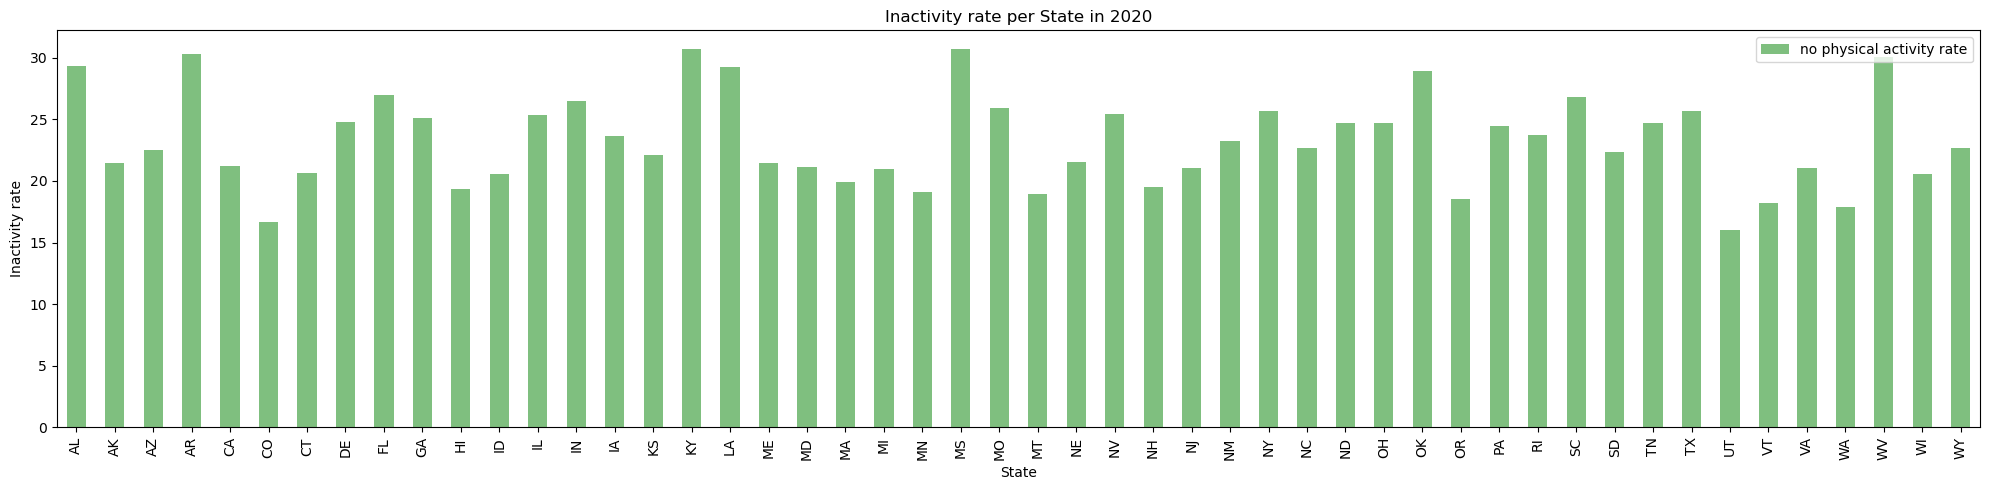

In [22]:
# Use DataFrame.plot() in order to create a bar chart of the data
condensed_suicide_activity_2020_df.plot(kind="bar", figsize=(20,5), color="green", alpha=0.5)

# Set a title for the chart
plt.title("Inactivity rate per State in 2020")
plt.ylabel("Inactivity rate")
plt.tight_layout()
plt.savefig("../../images/Inactivity2020.png")
plt.show()


In [23]:
# To find the top 5 states with the highest inactivity rates
top_5_states_inactivity_2020 = condensed_suicide_activity_2020_df.nlargest(5, 'no physical activity rate')
top_5_states_inactivity_2020

,no physical activity rate
State,
KY,30.680407
MS,30.666996
AR,30.329268
WV,30.042945
AL,29.292672


In [24]:
# To find the bottom 5 states with the lowest inactivity rates
bottom_5_states_inactivity_2020 = condensed_suicide_activity_2020_df.nsmallest(5, 'no physical activity rate')
bottom_5_states_inactivity_2020

,no physical activity rate
State,
UT,15.988530
CO,16.674088
WA,17.908555
VT,18.222685
OR,18.500000


Text(0, 0.5, 'Suicide rate')

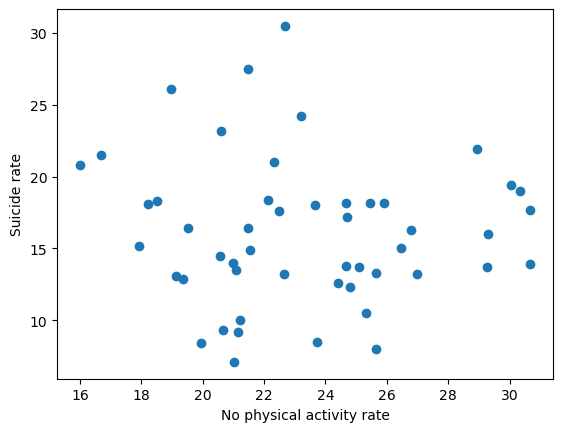

In [25]:
# Generate a scatter plot
suicide_rate = merged_suicide_activity_2020_df["Suicide Rate"]
no_physical_activity_rate = merged_suicide_activity_2020_df["no physical activity rate"]
plt.scatter(no_physical_activity_rate, suicide_rate)
plt.xlabel('No physical activity rate')
plt.ylabel('Suicide rate')

The r-value is: 0.0032854599497961602


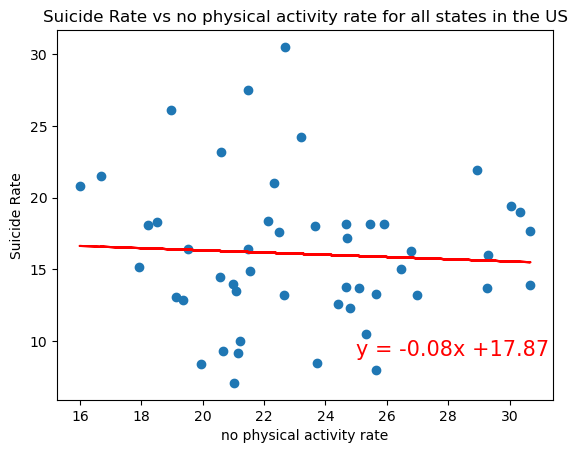

In [26]:
# Linear regression 
def linear_regression(df, x_col_name, y_col_name, coord):

    # Define a function to create Linear Regression plots
    x_values = df[x_col_name]
    y_values = df[y_col_name]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel(x_col_name)
    plt.ylabel(y_col_name)
    plt.title(f"{y_col_name} vs {x_col_name} for all states in the US")
    plt.annotate(line_eq, coord, fontsize=15,color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # # Show plot
    # plt.show()


# Perform a linear regression on suicide rate vs no activity rate for year 2020
linear_regression(merged_suicide_activity_2020_df , "no physical activity rate", "Suicide Rate", (25,9))
plt.savefig("../../images/Suicide rate vs no physical activity in 2020.png")
plt.show()


# Year 2019

In [27]:
# Filter by year 2019
suicide_activity_2019_df = suicide_activity_df.loc[suicide_activity_df['Year'] == 2019]
suicide_activity_2019_df.head()

,Year,State,Suicide Rate,DEATHS,Location,Question,Data_Value,Low_Confidence,High_Confidence,Sample_Size,Age(years),Gender,Race/Ethnicity
1400,2019,AL,16.3,804,Alabama,Percent of adults who achieve at least 300 min...,28.7,18.2,42.0,88.0,NaN,NaN,American Indian/Alaska Native
1401,2019,AL,16.3,804,Alabama,Percent of adults who achieve at least 150 min...,36.9,31.6,42.4,544.0,NaN,NaN,NaN
1402,2019,AL,16.3,804,Alabama,Percent of adults who engage in no leisure-tim...,16.2,8.6,28.5,88.0,NaN,NaN,Hispanic
1403,2019,AL,16.3,804,Alabama,Percent of adults who engage in no leisure-tim...,34.3,32.4,36.3,3983.0,NaN,Female,NaN
1404,2019,AL,16.3,804,Alabama,Percent of adults who achieve at least 150 min...,49.6,36.3,62.9,83.0,NaN,NaN,Hispanic


In [28]:
# Filter by question
# physical_activity_2019_filter_s = suicide_activity_2019_df['Question'] == "Percent of adults who engage in no leisure-time physical activity"
suicide_activity_2019_no_activity_df = suicide_activity_2019_df.loc[suicide_activity_2019_df['Question'] == "Percent of adults who engage in no leisure-time physical activity"]
suicide_activity_2019_no_activity_df.head()

,Year,State,Suicide Rate,DEATHS,Location,Question,Data_Value,Low_Confidence,High_Confidence,Sample_Size,Age(years),Gender,Race/Ethnicity
1402,2019,AL,16.3,804,Alabama,Percent of adults who engage in no leisure-tim...,16.2,8.6,28.5,88.0,NaN,NaN,Hispanic
1403,2019,AL,16.3,804,Alabama,Percent of adults who engage in no leisure-tim...,34.3,32.4,36.3,3983.0,NaN,Female,NaN
1407,2019,AL,16.3,804,Alabama,Percent of adults who engage in no leisure-tim...,36.9,33.8,40.2,1443.0,55 - 64,NaN,NaN
1412,2019,AL,16.3,804,Alabama,Percent of adults who engage in no leisure-tim...,34.7,23.1,48.3,84.0,NaN,NaN,2 or more races
1416,2019,AL,16.3,804,Alabama,Percent of adults who engage in no leisure-tim...,39.6,35.6,43.8,1040.0,NaN,NaN,NaN


In [29]:
# Filter by certain columns
Value_by_gender_2019 = suicide_activity_2019_no_activity_df[["Data_Value","Sample_Size","Gender","State"]]
Value_by_gender_2019.head()

,Data_Value,Sample_Size,Gender,State
1402,16.2,88.0,NaN,AL
1403,34.3,3983.0,Female,AL
1407,36.9,1443.0,NaN,AL
1412,34.7,84.0,NaN,AL
1416,39.6,1040.0,NaN,AL


In [30]:
# Setting the index to states
Value_by_gender_2019 = Value_by_gender_2019.dropna().set_index("State")
Value_by_gender_2019

,Data_Value,Sample_Size,Gender
State,,,
AL,34.3,3983.0,Female
AL,28.3,2705.0,Male
AK,21.2,1474.0,Female
AK,22.1,1345.0,Male
AZ,22.2,3830.0,Male
...,...,...,...
GU,25.1,1086.0,Male
US,27.5,211703.0,Female
US,24.4,176341.0,Male


In [31]:
# Find the number of people who do not work out by state and gender
Value_by_gender_2019["no_physical_activity"] = Value_by_gender_2019["Data_Value"] * Value_by_gender_2019["Sample_Size"] / 100
Value_by_gender_2019.head()

,Data_Value,Sample_Size,Gender,no_physical_activity
State,,,,
AL,34.3,3983.0,Female,1366.169
AL,28.3,2705.0,Male,765.515
AK,21.2,1474.0,Female,312.488
AK,22.1,1345.0,Male,297.245
AZ,22.2,3830.0,Male,850.260


In [32]:
# Find the sum for the sample size and people who do not exercise
total_people_2019 = Value_by_gender_2019.groupby("State")["Sample_Size","no_physical_activity"].sum()
total_people_2019.head()

C:\Users\MishkisPCDell\AppData\Local\Temp\ipykernel_4036\3998799752.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_people_2019 = Value_by_gender_2019.groupby("State")["Sample_Size","no_physical_activity"].sum()


,Sample_Size,no_physical_activity
State,,
AK,2819.0,609.733
AL,6688.0,2131.684
AR,5086.0,1609.706
AZ,8393.0,2032.077
CA,10701.0,2394.117


In [33]:
# Find the inactivity rates by state
avg_no_physical_activity_2019 = total_people_2019["no_physical_activity"] / total_people_2019["Sample_Size"] * 100

total_people_2019["no physical activity rate"] = avg_no_physical_activity_2019

total_people_2019.head()


,Sample_Size,no_physical_activity,no physical activity rate
State,,,
AK,2819.0,609.733,21.629408
AL,6688.0,2131.684,31.873266
AR,5086.0,1609.706,31.649744
AZ,8393.0,2032.077,24.211569
CA,10701.0,2394.117,22.372834


In [34]:
# Merging for year 2019
suicide_2019 = suicide.loc[suicide['Year'] == 2019]
suicide_2019
merged_suicide_activity_2019_df = pd.merge(suicide_2019, total_people_2019, on=["State"], how="outer")
merged_suicide_activity_2019_df


,Year,State,Suicide Rate,DEATHS,Sample_Size,no_physical_activity,no physical activity rate
0,2019.0,AL,16.3,804,6688.0,2131.684,31.873266
1,2019.0,AK,28.5,210,2819.0,609.733,21.629408
2,2019.0,AZ,18.7,1419,8393.0,2032.077,24.211569
3,2019.0,AR,18.0,548,5086.0,1609.706,31.649744
4,2019.0,CA,10.7,4436,10701.0,2394.117,22.372834
5,2019.0,CO,22.1,1312,8639.0,1615.152,18.696053
6,2019.0,CT,11.4,435,8590.0,2028.008,23.608941
7,2019.0,DE,11.3,111,3647.0,976.622,26.778777
8,2019.0,FL,14.5,3465,15682.0,4158.974,26.520686
9,2019.0,GA,14.6,1585,6780.0,1899.708,28.019292


In [35]:
# Dropping any not available data
merged_suicide_activity_2019_df = merged_suicide_activity_2019_df.dropna()
merged_suicide_activity_2019_df

,Year,State,Suicide Rate,DEATHS,Sample_Size,no_physical_activity,no physical activity rate
0,2019.0,AL,16.3,804,6688.0,2131.684,31.873266
1,2019.0,AK,28.5,210,2819.0,609.733,21.629408
2,2019.0,AZ,18.7,1419,8393.0,2032.077,24.211569
3,2019.0,AR,18.0,548,5086.0,1609.706,31.649744
4,2019.0,CA,10.7,4436,10701.0,2394.117,22.372834
5,2019.0,CO,22.1,1312,8639.0,1615.152,18.696053
6,2019.0,CT,11.4,435,8590.0,2028.008,23.608941
7,2019.0,DE,11.3,111,3647.0,976.622,26.778777
8,2019.0,FL,14.5,3465,15682.0,4158.974,26.520686
9,2019.0,GA,14.6,1585,6780.0,1899.708,28.019292


Text(0, 0.5, 'Suicide rate')

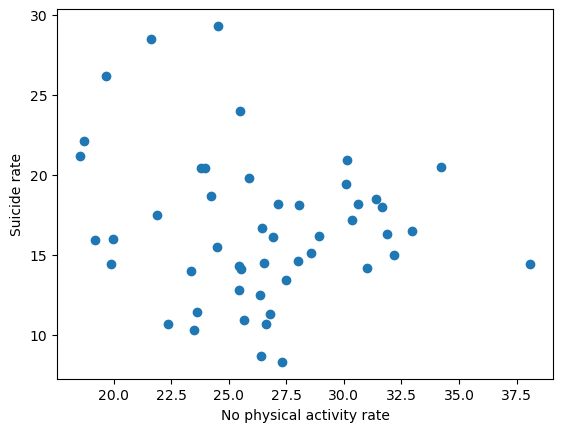

In [36]:
# Generate a scatter plot
suicide_rate_2019 = merged_suicide_activity_2019_df["Suicide Rate"]
no_activity_rate_2019 = merged_suicide_activity_2019_df["no physical activity rate"]
plt.scatter(no_activity_rate_2019, suicide_rate_2019)
plt.xlabel('No physical activity rate')
plt.ylabel('Suicide rate')

The r-value is: 0.022747596923640857


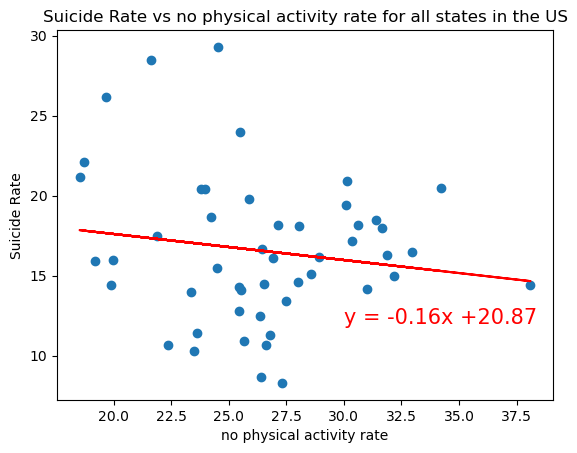

In [37]:
# Perform a linear regression on suicide rate vs no activity rate for year 2020
linear_regression(merged_suicide_activity_2019_df , "no physical activity rate", "Suicide Rate", (30,12))
plt.savefig("../../images/Suicide rate vs no physical activity in 2019.png")
plt.show()

In [38]:
# Calculate for people who do some physical activity
physical_activity_2019_filter_s = suicide_activity_2019_df['Question'] == "Percent of adults who engage in no leisure-time physical activity"
suicide_activity_2019_some_activity_df = suicide_activity_2019_df.loc[~physical_activity_2019_filter_s]
suicide_activity_2019_some_activity_df.head()

,Year,State,Suicide Rate,DEATHS,Location,Question,Data_Value,Low_Confidence,High_Confidence,Sample_Size,Age(years),Gender,Race/Ethnicity
1400,2019,AL,16.3,804,Alabama,Percent of adults who achieve at least 300 min...,28.7,18.2,42.0,88.0,NaN,NaN,American Indian/Alaska Native
1401,2019,AL,16.3,804,Alabama,Percent of adults who achieve at least 150 min...,36.9,31.6,42.4,544.0,NaN,NaN,NaN
1404,2019,AL,16.3,804,Alabama,Percent of adults who achieve at least 150 min...,49.6,36.3,62.9,83.0,NaN,NaN,Hispanic
1405,2019,AL,16.3,804,Alabama,Percent of adults who engage in muscle-strengt...,23.7,21.7,25.8,2473.0,65 or older,NaN,NaN
1406,2019,AL,16.3,804,Alabama,Percent of adults who engage in muscle-strengt...,23.7,20.8,26.7,1388.0,55 - 64,NaN,NaN


In [39]:
# Filter by certain columns
Value_by_gender_2019_activity = suicide_activity_2019_some_activity_df[["Data_Value","Sample_Size","Gender","State","Question"]]
Value_by_gender_2019_activity.head()

,Data_Value,Sample_Size,Gender,State,Question
1400,28.7,88.0,NaN,AL,Percent of adults who achieve at least 300 min...
1401,36.9,544.0,NaN,AL,Percent of adults who achieve at least 150 min...
1404,49.6,83.0,NaN,AL,Percent of adults who achieve at least 150 min...
1405,23.7,2473.0,NaN,AL,Percent of adults who engage in muscle-strengt...
1406,23.7,1388.0,NaN,AL,Percent of adults who engage in muscle-strengt...


In [40]:
# Drop the not available datas and set index to state
Value_by_gender_2019_activity = Value_by_gender_2019_activity.dropna().set_index("State")
Value_by_gender_2019_activity

,Data_Value,Sample_Size,Gender,Question
State,,,,
AL,30.7,2531.0,Male,Percent of adults who achieve at least 300 min...
AL,14.8,3674.0,Female,Percent of adults who achieve at least 150 min...
AL,24.9,3726.0,Female,Percent of adults who achieve at least 300 min...
AL,48.6,2494.0,Male,Percent of adults who achieve at least 150 min...
AL,24.6,3845.0,Female,Percent of adults who engage in muscle-strengt...
...,...,...,...,...
PR,12.4,3642.0,Female,Percent of adults who achieve at least 300 min...
PR,5.8,3640.0,Female,Percent of adults who achieve at least 150 min...
PR,26.9,3614.0,Female,Percent of adults who achieve at least 150 min...


In [41]:
# Find the number of people who do some physical activity
Value_by_gender_2019_activity["some physical activity"] = Value_by_gender_2019_activity["Data_Value"] * Value_by_gender_2019_activity["Sample_Size"] / 100
Value_by_gender_2019_activity

,Data_Value,Sample_Size,Gender,Question,some physical activity
State,,,,,
AL,30.7,2531.0,Male,Percent of adults who achieve at least 300 min...,777.017
AL,14.8,3674.0,Female,Percent of adults who achieve at least 150 min...,543.752
AL,24.9,3726.0,Female,Percent of adults who achieve at least 300 min...,927.774
AL,48.6,2494.0,Male,Percent of adults who achieve at least 150 min...,1212.084
AL,24.6,3845.0,Female,Percent of adults who engage in muscle-strengt...,945.870
...,...,...,...,...,...
PR,12.4,3642.0,Female,Percent of adults who achieve at least 300 min...,451.608
PR,5.8,3640.0,Female,Percent of adults who achieve at least 150 min...,211.120
PR,26.9,3614.0,Female,Percent of adults who achieve at least 150 min...,972.166


In [42]:
# Find the total number of people who exercise
total_people_2019_activity = Value_by_gender_2019_activity.groupby(["State", "Question"])["Sample_Size","some physical activity"].sum()
total_people_2019_activity.head()

C:\Users\MishkisPCDell\AppData\Local\Temp\ipykernel_4036\1895187386.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_people_2019_activity = Value_by_gender_2019_activity.groupby(["State", "Question"])["Sample_Size","some physical activity"].sum()


Sample_Size  \
State Question                                                          
AK    Percent of adults who achieve at least 150 minu...       2658.0   
      Percent of adults who achieve at least 150 minu...       2604.0   
      Percent of adults who achieve at least 300 minu...       2658.0   
      Percent of adults who engage in muscle-strength...       2703.0   
AL    Percent of adults who achieve at least 150 minu...       6207.0   

                                                          some physical activity  
State Question                                                                    
AK    Percent of adults who achieve at least 150 minu...                1520.578  
      Percent of adults who achieve at least 150 minu...                 662.082  
      Percent of adults who achieve at least 300 minu...                1023.775  
      Percent of adults who engage in muscle-strength...                1007.923  
AL    Percent of adults who achieve at least 150 minu...                2830.952

In [43]:
# total_people_2019_activity = Value_by_gender_2019_activity.groupby("State")["Sample_Size","some physical activity"].sum()
# total_people_2019_activity.head()

In [44]:
# Find the average physical activity rate by each category of the question
avg_some_physical_activity_2019 = total_people_2019_activity["some physical activity"] / total_people_2019_activity["Sample_Size"] * 100

total_people_2019_activity["physical activity rate"] = avg_some_physical_activity_2019

total_people_2019_activity.head()

Sample_Size  \
State Question                                                          
AK    Percent of adults who achieve at least 150 minu...       2658.0   
      Percent of adults who achieve at least 150 minu...       2604.0   
      Percent of adults who achieve at least 300 minu...       2658.0   
      Percent of adults who engage in muscle-strength...       2703.0   
AL    Percent of adults who achieve at least 150 minu...       6207.0   

                                                          some physical activity  \
State Question                                                                     
AK    Percent of adults who achieve at least 150 minu...                1520.578   
      Percent of adults who achieve at least 150 minu...                 662.082   
      Percent of adults who achieve at least 300 minu...                1023.775   
      Percent of adults who engage in muscle-strength...                1007.923   
AL    Percent of adults who achieve at least 150 minu...                2830.952   

                                                          physical activity rate  
State Question                                                                    
AK    Percent of adults who achieve at least 150 minu...               57.207600  
      Percent of adults who achieve at least 150 minu...               25.425576  
      Percent of adults who achieve at least 300 minu...               38.516742  
      Percent of adults who engage in muscle-strength...               37.289049  
AL    Percent of adults who achieve at least 150 minu...               45.609022

In [45]:
# Find the average physical activity rates by state
avg_total_people_2019_activity = total_people_2019_activity.groupby("State")["physical activity rate"].mean()
avg_total_people_2019_activity


State
AK    39.609742
AL    29.654840
AR    31.977690
AZ    38.048424
CA    36.291299
CO    40.850897
CT    38.247929
DC    39.221164
DE    36.164548
FL    39.279700
GA    35.166479
GU    32.796743
HI    38.662467
IA    32.842083
ID    37.731403
IL    35.496669
IN    32.884657
KS    33.206312
KY    25.255921
LA    31.495171
MA    35.307374
MD    35.778803
ME    34.105895
MI    35.584798
MN    39.273835
MO    28.881912
MS    26.408040
MT    44.203918
NC    33.359158
ND    31.960404
NE    33.426007
NH    40.074288
NM    38.268579
NV    33.862961
NY    36.218342
OH    33.448674
OK    25.678648
OR    38.310348
PA    34.416818
PR    15.647230
RI    35.418661
SC    34.810791
SD    32.661433
TN    33.393699
TX    34.567600
US    35.312517
UT    37.982104
VA    34.567048
VT    43.490486
WA    40.057702
WI    37.695090
WV    30.507340
WY    38.235435
Name: physical activity rate, dtype: float64

In [46]:
# Put into a dataframe
total_people_2019_activity_complete = pd.DataFrame({"avg physical rate": avg_total_people_2019_activity})
total_people_2019_activity_complete.head()

,avg physical rate
State,
AK,39.609742
AL,29.654840
AR,31.977690
AZ,38.048424
CA,36.291299


In [47]:
# Merge with suicide dataframe for year 2019
merged_suicide_some_activity_2019_df = pd.merge(suicide_2019, total_people_2019_activity_complete, on=["State"], how="outer")
merged_suicide_some_activity_2019_df.head()

,Year,State,Suicide Rate,DEATHS,avg physical rate
0,2019.0,AL,16.3,804,29.654840
1,2019.0,AK,28.5,210,39.609742
2,2019.0,AZ,18.7,1419,38.048424
3,2019.0,AR,18.0,548,31.977690
4,2019.0,CA,10.7,4436,36.291299


In [48]:
# Dropping not available data
merged_suicide_some_activity_2019_df = merged_suicide_some_activity_2019_df.dropna()
merged_suicide_some_activity_2019_df.head()

,Year,State,Suicide Rate,DEATHS,avg physical rate
0,2019.0,AL,16.3,804,29.654840
1,2019.0,AK,28.5,210,39.609742
2,2019.0,AZ,18.7,1419,38.048424
3,2019.0,AR,18.0,548,31.977690
4,2019.0,CA,10.7,4436,36.291299


Text(0, 0.5, 'Suicide rate')

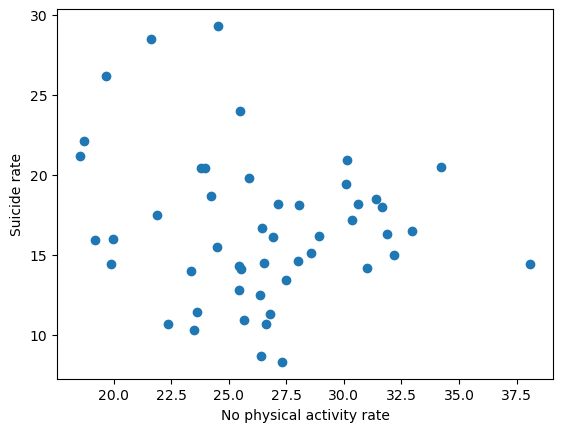

In [49]:
# Generate a scatter plot
suicide_rate_2019 = merged_suicide_activity_2019_df["Suicide Rate"]
no_activity_rate_2019 = merged_suicide_activity_2019_df["no physical activity rate"]
plt.scatter(no_activity_rate_2019, suicide_rate_2019)
plt.xlabel('No physical activity rate')
plt.ylabel('Suicide rate')

The r-value is: 0.03085582612680137


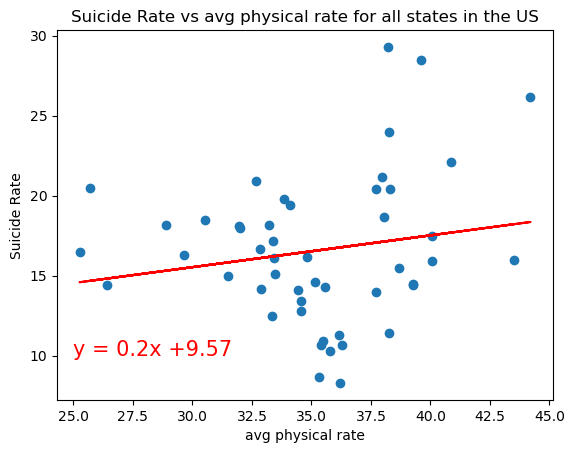

In [50]:
# Perform a linear regression on suicide rate vs some activity rate for year 2019
linear_regression(merged_suicide_some_activity_2019_df, "avg physical rate", "Suicide Rate", (25,10))
plt.savefig("../../images/Suicide rate vs some physical activity in 2019.png")
plt.show()